In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("Enquête _ Association Défense et Sécurité à Sciences Po Saint-Germain (réponses) - Réponses au formulaire 1.csv")
df.head()

,Horodateur,En quelle année êtes-vous ?,Quel est votre cursus ?,A quelle fréquence suivez-vous l'actualité des enjeux de défense et de sécurité ?,"A quelle échelle suivez-vous l'actualité des enjeux de défense et de sécurité ?\nSi vous suivez l'actualité de régions géographiques en particulier, précisez-le dans ""Autre"".",Souhaitez-vous ou comptez vous enrichir votre parcours universitaire par des formations en lien avec les enjeux de sécurité et de défense ?,Votre projet professionel est-il en lien avec les questions de sécurité et de défense ?,"Souhaitez-vous nous présenter ce projet ou cette formation ?\nSi vous souhaitez partager avec nous ce projet ou cette formation, nous serions enchantés d'en apprendre un peu plus sur vous.",Participeriez-vous à des activités comme des visites d'institutions qui se saisissent des questions de sécurité et de défense ?,Seriez-vous intéressés par des rencontres avec des acteurs de ce secteur ?\nEx : Format conférence...,"Si un tel projet devait être porté par une nouvelle association dans l'IEP, comment souhaiteriez-vous y contribuer ?","Des pôles thématiques pourraient s'occuper de certaines dimensions particulières des enjeux de sécurité et de défense, quels pôles vous intéresseraient ?\nEx : Cybersécurité, défense européenne"
0,14/04/2025 16:29:35,2,Formation générale (1A - 3A),Occasionnellement,Internationale,"Oui, c'est déjà le cas",Absolument,NaN,Pas vraiment,Certainement,Dans ses pôles,"Défense du territoire, sécurité intérieure"
1,14/04/2025 16:31:06,2,Double Diplôme Audencia,Souvent,"Nationale, Européenne, Internationale","Oui, je l'espère",En partie,NaN,Pas vraiment,Certainement,En tant que membre adhérent,NaN
2,14/04/2025 16:45:07,3,Formation générale (1A - 3A),Je n'en rate pas une,"Nationale, Européenne, Internationale","Oui, je l'espère",Absolument,J’adorerais travailler chez Interpol,Certainement,Certainement,Dans son bureau,Bé là où je peux me rendre utile! Mais pourquo...
3,14/04/2025 16:48:14,3,Formation générale (1A - 3A),Souvent,"Européenne, Transatlantique, Internationale, M...","Oui, je l'espère",En partie,NaN,Probablement,Certainement,En tant que membre adhérent,Sécurité extérieure (projection de puissance e...
4,14/04/2025 16:54:06,3,Formation générale (1A - 3A),Occasionnellement,Internationale,"Oui, je l'espère",En partie,NaN,Certainement,Certainement,Dans ses pôles,Sécurité extérieure


In [125]:
df.columns = ["Date", "Année", "Cursus", "Fréquence actualité", 
              "Echelle actualité", "Sécu-Déf académique", 
              "Sécu-Déf professionnel", "Expliquez", "Visites", 
              "Conférences", "Participation", "Pôles"]
df.head()

,Date,Année,Cursus,Fréquence actualité,Echelle actualité,Sécu-Déf académique,Sécu-Déf professionnel,Expliquez,Visites,Conférences,Participation,Pôles
0,14/04/2025 16:29:35,2,Formation générale (1A - 3A),Occasionnellement,Internationale,"Oui, c'est déjà le cas",Absolument,NaN,Pas vraiment,Certainement,Dans ses pôles,"Défense du territoire, sécurité intérieure"
1,14/04/2025 16:31:06,2,Double Diplôme Audencia,Souvent,"Nationale, Européenne, Internationale","Oui, je l'espère",En partie,NaN,Pas vraiment,Certainement,En tant que membre adhérent,NaN
2,14/04/2025 16:45:07,3,Formation générale (1A - 3A),Je n'en rate pas une,"Nationale, Européenne, Internationale","Oui, je l'espère",Absolument,J’adorerais travailler chez Interpol,Certainement,Certainement,Dans son bureau,Bé là où je peux me rendre utile! Mais pourquo...
3,14/04/2025 16:48:14,3,Formation générale (1A - 3A),Souvent,"Européenne, Transatlantique, Internationale, M...","Oui, je l'espère",En partie,NaN,Probablement,Certainement,En tant que membre adhérent,Sécurité extérieure (projection de puissance e...
4,14/04/2025 16:54:06,3,Formation générale (1A - 3A),Occasionnellement,Internationale,"Oui, je l'espère",En partie,NaN,Certainement,Certainement,Dans ses pôles,Sécurité extérieure


In [126]:
sns.set_theme("paper")

Text(0.5, 1.0, 'Répartition des cursus par année universitaire')

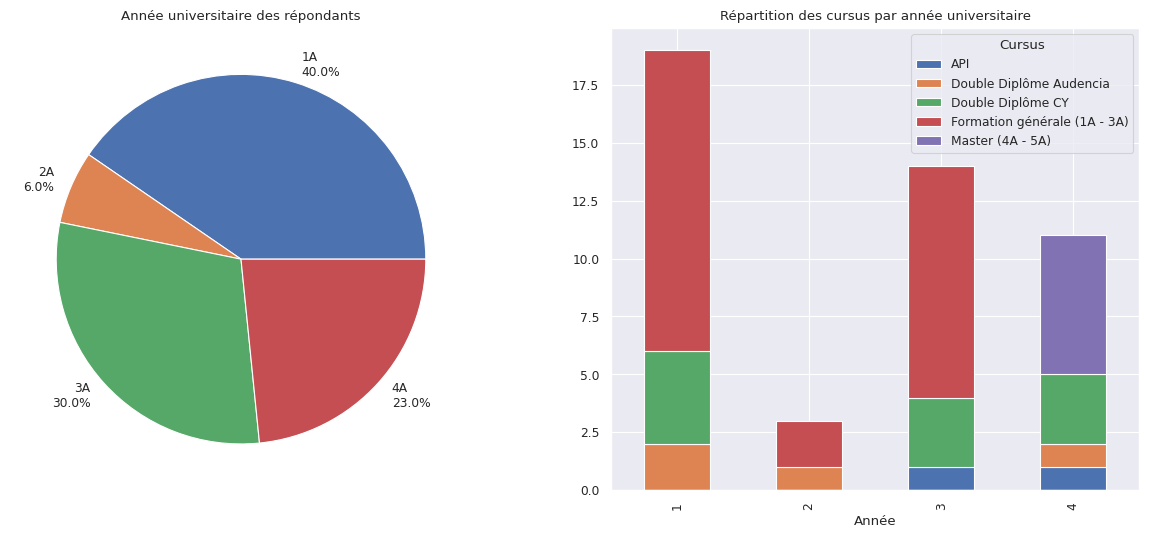

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

props = df.groupby("Année").size().reset_index(name="count")
props["proportion"] = props["count"] / sum(props["count"])
props["Année"] = props["Année"].astype(str) + "A" + "\n" + (round(props["proportion"] * 100)).astype(str) + "%"
ax[0].pie(props["count"], labels=props["Année"])
ax[0].set_title("Année universitaire des répondants")

props = df.groupby(["Année", "Cursus"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Cursus", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition des cursus par année universitaire")

+ On estime notre taux de réponse entre 25% et 35%

Text(0.5, 1.0, "Répartition de l'intérêt porté à l'actualité par année universitaire")

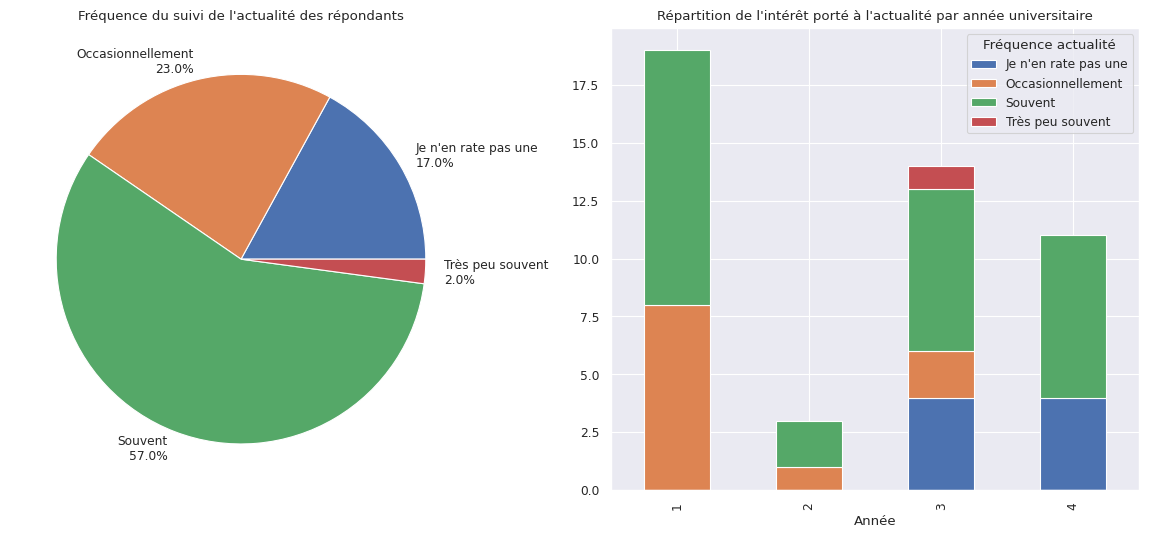

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

props = df.groupby("Fréquence actualité").size().reset_index(name="count")
props["proportion"] = props["count"] / sum(props["count"])
props["Fréquence actualité"] = props["Fréquence actualité"].astype(str) + "\n" + (round(props["proportion"] * 100)).astype(str) + "%"
ax[0].pie(props["count"], labels=props["Fréquence actualité"])
ax[0].set_title("Fréquence du suivi de l'actualité des répondants")

props = df.groupby(["Année", "Fréquence actualité"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Fréquence actualité", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition de l'intérêt porté à l'actualité par année universitaire")

+ 98% déjà intéressés par l'actu sécu
+ 65% d'entre eux se tiennent régulièrement à jour
+ Ils sont une audience facile et des rédacteurs potentiels pour nos fiches d'actu en temps réel (ex Hugo Decrypt)
+ Ils sont des lecteurs et des auteurs potentiels pour nos fiches techiques sur des sujets spécifiques (ex OERI)

In [129]:
df_copy = df.copy()
df_copy["Echelle actualité"] = df_copy["Echelle actualité"].replace("Afrique de l'Ouest", "Afrique")
df_copy["Echelle actualité"] = df_copy["Echelle actualité"].str.split(", ")
df_copy = df_copy.explode("Echelle actualité")
df_copy = df_copy.fillna("nan")
df_copy = df_copy.fillna("nan")[df_copy["Echelle actualité"] != "nan"]
df_copy["Echelle actualité"].unique()

array(['Internationale', 'Nationale', 'Européenne', 'Transatlantique',
       'Moyen Orient', 'Afrique'], dtype=object)

Text(0.5, 1.0, "Répartition des échelles de suivi de l'actualité par année universitaire")

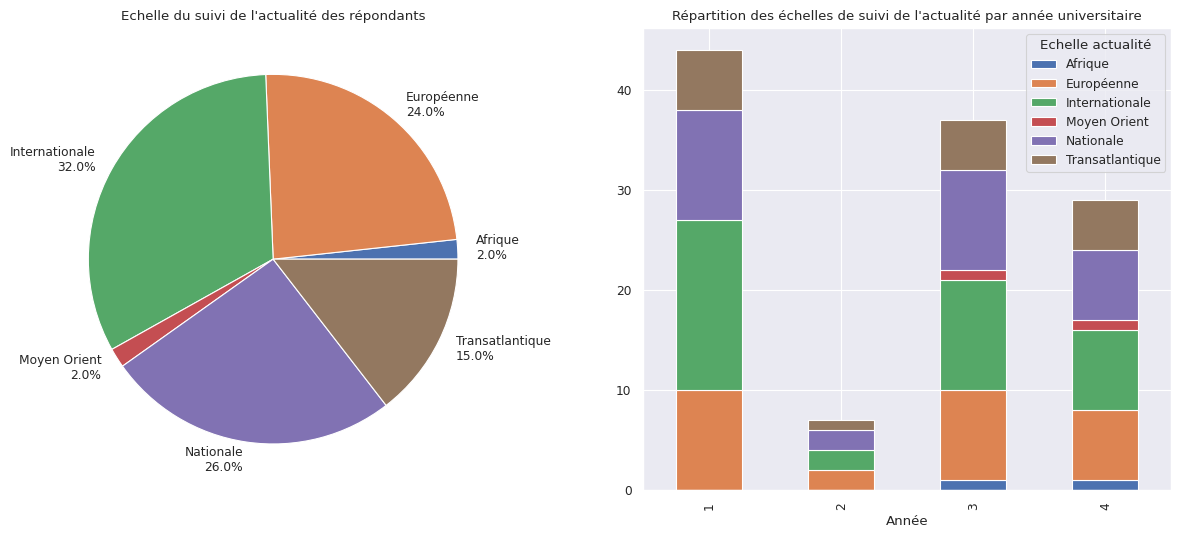

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

props = df_copy.groupby("Echelle actualité").size().reset_index(name="count")
props["proportion"] = props["count"] / sum(props["count"])
props["Echelle actualité"] = props["Echelle actualité"].astype(str) + "\n" + (round(props["proportion"] * 100)).astype(str) + "%"

ax[0].pie(props["count"], labels=props["Echelle actualité"])
ax[0].set_title("Echelle du suivi de l'actualité des répondants")

props = df_copy.groupby(["Année", "Echelle actualité"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Echelle actualité", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition des échelles de suivi de l'actualité par année universitaire")

+ Uniformité de la répartition des échelles entre les promos
+ Si on propose du contenu sur ceux-ci, l'audiance sera mixte 
+ Les promotions les plus avancées s'intéressent à des zones géographiques plus précises
+ Diversité des sujets pouvant être traîtés dans nos fiches techniques (ex OERI)

Text(0.5, 1.0, "Répartition de l'intégration des enjeux de sécurité-défense\ndans le cursus académique par année universitaire")

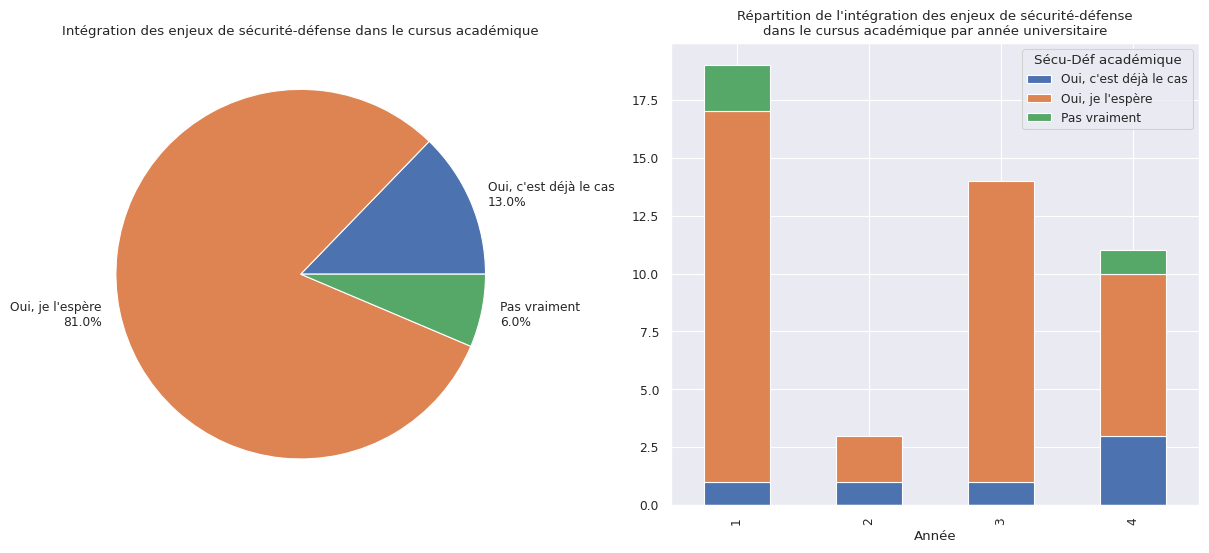

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

props = df.groupby("Sécu-Déf académique").size().reset_index(name="count")
props["proportion"] = props["count"] / sum(props["count"])
props["Sécu-Déf académique"] = props["Sécu-Déf académique"].astype(str) + "\n" + (round(props["proportion"] * 100)).astype(str) + "%"

ax[0].pie(props["count"], labels=props["Sécu-Déf académique"])
ax[0].set_title("Intégration des enjeux de sécurité-défense dans le cursus académique")

props = df.groupby(["Année", "Sécu-Déf académique"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Sécu-Déf académique", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition de l'intégration des enjeux de sécurité-défense\ndans le cursus académique par année universitaire")

+ 95% des répondants veulent ou intégrent déjà ces enjeux dans leur parcours académique (préparations militaires ? ...)
+ 81% souhaitent le faire, notre association peut les aider à voir plus clair et plus large dans l'offre académique relative à ces sujets

Text(0.5, 1.0, "Répartition de l'intégration des enjeux de sécurité-défense\ndans le parcours professionnel par année universitaire")

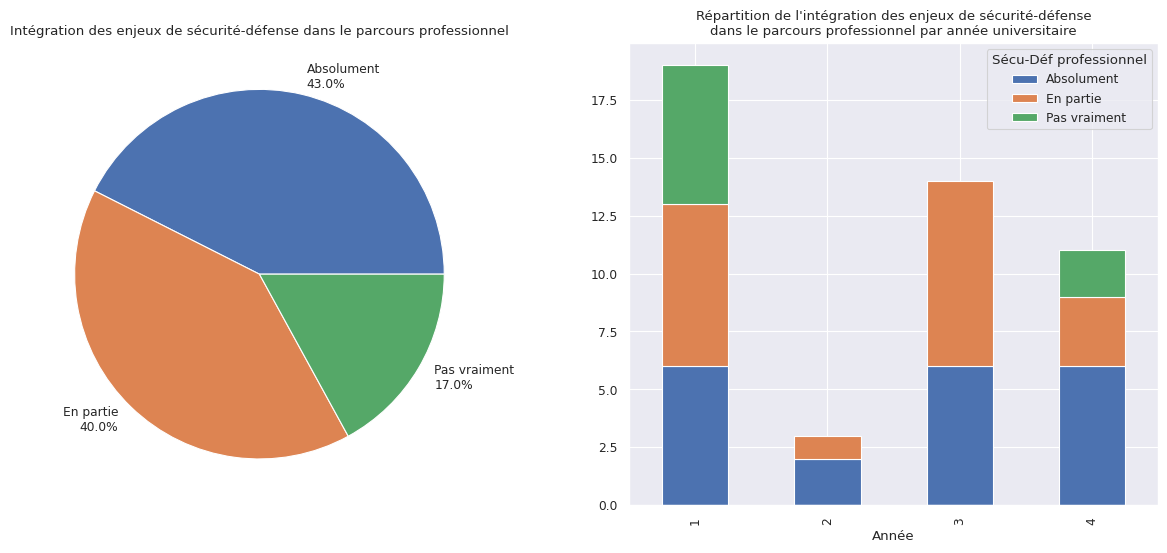

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

props = df.groupby("Sécu-Déf professionnel").size().reset_index(name="count")
props["proportion"] = props["count"] / sum(props["count"])
props["Sécu-Déf professionnel"] = props["Sécu-Déf professionnel"].astype(str) + "\n" + (round(props["proportion"] * 100)).astype(str) + "%"

ax[0].pie(props["count"], labels=props["Sécu-Déf professionnel"])
ax[0].set_title("Intégration des enjeux de sécurité-défense dans le parcours professionnel")

props = df.groupby(["Année", "Sécu-Déf professionnel"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Sécu-Déf professionnel", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition de l'intégration des enjeux de sécurité-défense\ndans le parcours professionnel par année universitaire")

+ 83% des répondants veulent travailler dans ce secteur, notre association peut les aider à rencontrer des gens qui y sont déjà et à mieux comprendre les parcours à suivre pour y parvenir

Text(0.5, 1.0, "Répartition de la volonté de participer à\nl'organisation des activité et l'administration de l'association\npar année universitaire")

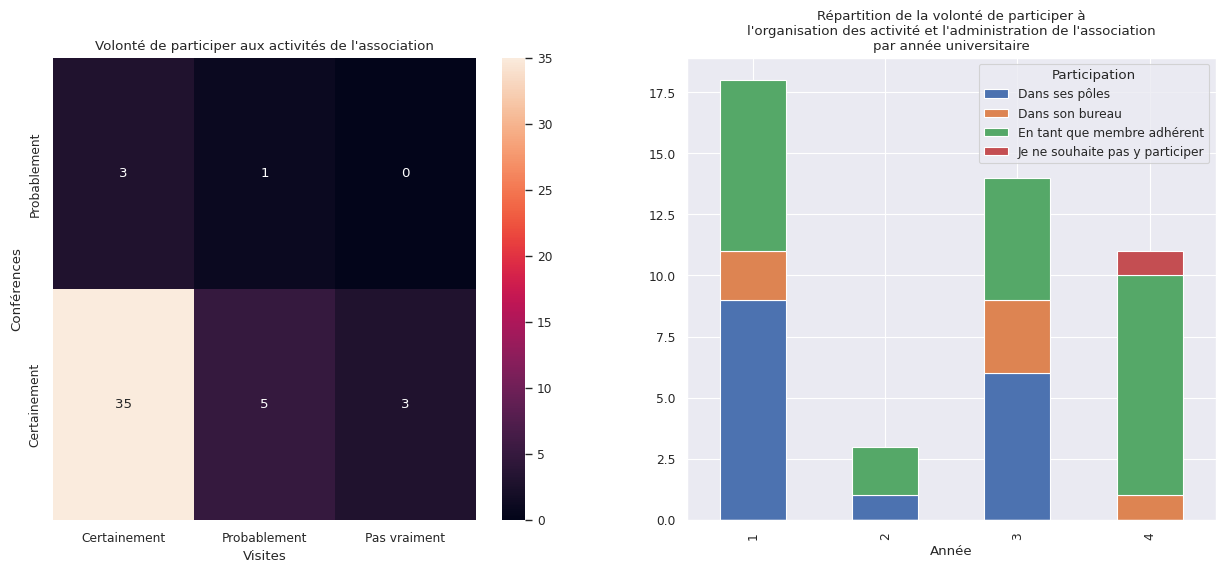

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(pd.crosstab(df["Conférences"], df["Visites"])
    .reindex(index=["Probablement", "Certainement"], 
     columns=["Certainement", "Probablement", "Pas vraiment"]), annot=True, ax=ax[0])
ax[0].set_title("Volonté de participer aux activités de l'association")

props = df.groupby(["Année", "Participation"]).size().reset_index(name="count")
piv_props = props.pivot(index="Année", columns="Participation", values="count")
piv_props.plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Répartition de la volonté de participer à\nl'organisation des activité et l'administration de l'association\npar année universitaire")

+ 75% des répondants sont intéressés par les conférences ET par les visites, qui sont des activités généralement proposées par les associations de ce type
+ Les 3 promotions qui occuperont le campus l'an prochain sont intéressés par le bureau, assurant une continuité mixte dans l'administration du bureau
+ La moitié des 1A et des 3A souhaitent participer dans les pôles => organiser les activités et faire vivre l'association

Les gars par pitié rédigez bien, là je vous ai mis le minimum pour pas surcharger le rapport
La colonne sur les pôles et les thèmes je la traîterais plus tard